# 1. Introduction
<font size = "3"> In this notebook, I will be using the matrix_visualizer module to visualize several classic matrix transformations.</font>

In [1]:
import matrix_visualizer as mv
import numpy as np
import matplotlib.pyplot as plt

# 2. What is a matrix
<font size="3">A matrix represents a linear map, in which, vectors in the old space V get mapped into vectors in the new space W. More intuitively, a single vector, after applying a matrix (i.e., matrix-vector multiplication), becomes another vector.</font>

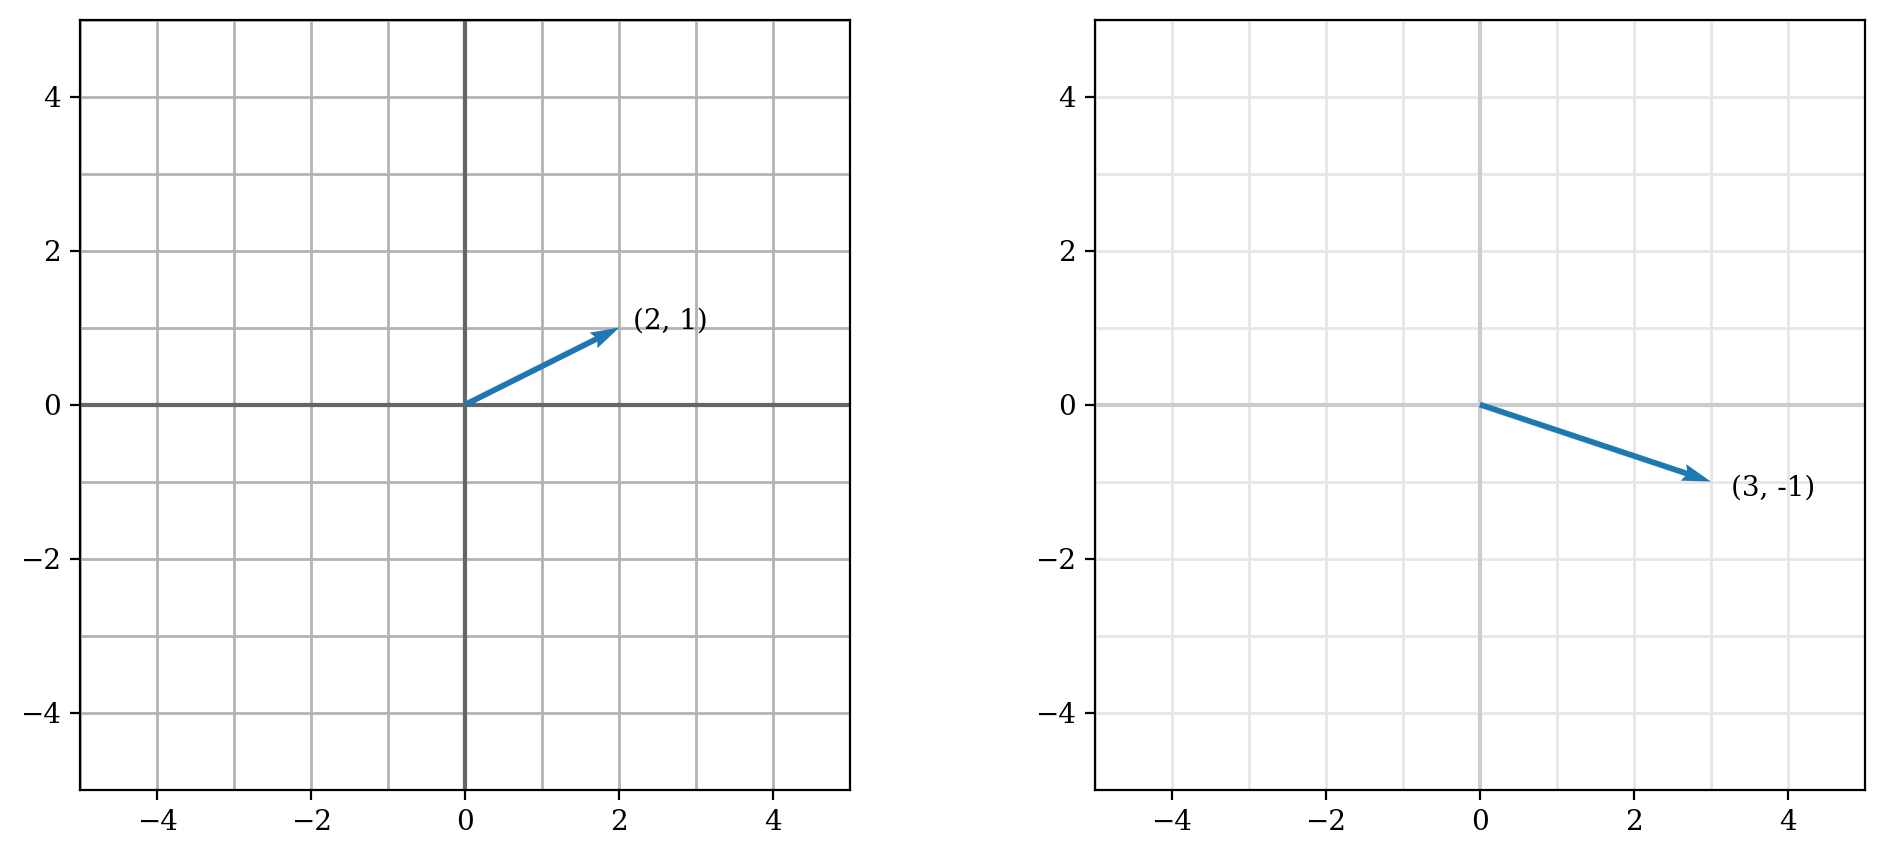

In [2]:
fig, axs = mv.plot_base()
mv.plot_vectors(np.array([[2, 1]]), ax = axs[0])
mv.plot_vectors(np.array([[3, -1]]), ax = axs[1])
plt.show()

<font size = "3">In the above example, the vector $\begin{bmatrix} 2\\1 \end{bmatrix}$ gets mapped to $\begin{bmatrix} 3\\-1 \end{bmatrix}$ by matrix $\begin{bmatrix} 2 & -1 \\ 1 & -3 \end{bmatrix}$. The matrix-vector multiplication is
$\begin{bmatrix} 2 & -1 \\ 1 & -3 \end{bmatrix}
\begin{bmatrix} 2\\1 \end{bmatrix} 
= \begin{bmatrix} 2\times2+(-1)\times1 \\ 1\times2+(-3)\times1 \end{bmatrix} 
= \begin{bmatrix} 3\\-1 \end{bmatrix}$
</font>

# 3. Basis vectors
<font size = '3'> The basis vectors of a vector space are a set of elemental vectors such that every vector within the space can be written as a unique linear combination of these basis vectors. A matrix transforms these basis vectors while preserving the linear combinations, such that all transformed vectors in the new space maintains the unique linear relationships with the new basis vectors. The matrix transformation can be conceptualized as some stretches or rotations about the origin of the gridlines, where every point remains fixed on the gridlines in the new space. 

To illustrate this mathematically, the columns in the matrix can be viewed as the coordinates of the basis vectors i and j, and the numbers in the vector represent the linear combination of the basis vectors.

$\begin{bmatrix} x_i & x_j \\ y_i & y_j \end{bmatrix}
 \begin{bmatrix} 2 \\ 1 \end{bmatrix}
 = \begin{bmatrix} 2x_i+1x_j \\ 2y_i + 1y_j \end{bmatrix}$

Before the transformation, the coordinates of the basis vectors can be represented by $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$, and its multiplication with $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ yields the same vector $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ (hence the matrix $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ is called “identity matrix”). After the transformation, the new coordinates of the basis vectors are represented by the transformation-matrix $\begin{bmatrix} 2 & -1 \\ 1 & -3 \end{bmatrix}$, and the multiplication with $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ yields the transformed vector $\begin{bmatrix} 3 \\ -1 \end{bmatrix}$.
    
The transformation of basis vectors and the preservation of linear combinations are illustrated below.
</font>

In [3]:
mt = mv.matrix_transformation()

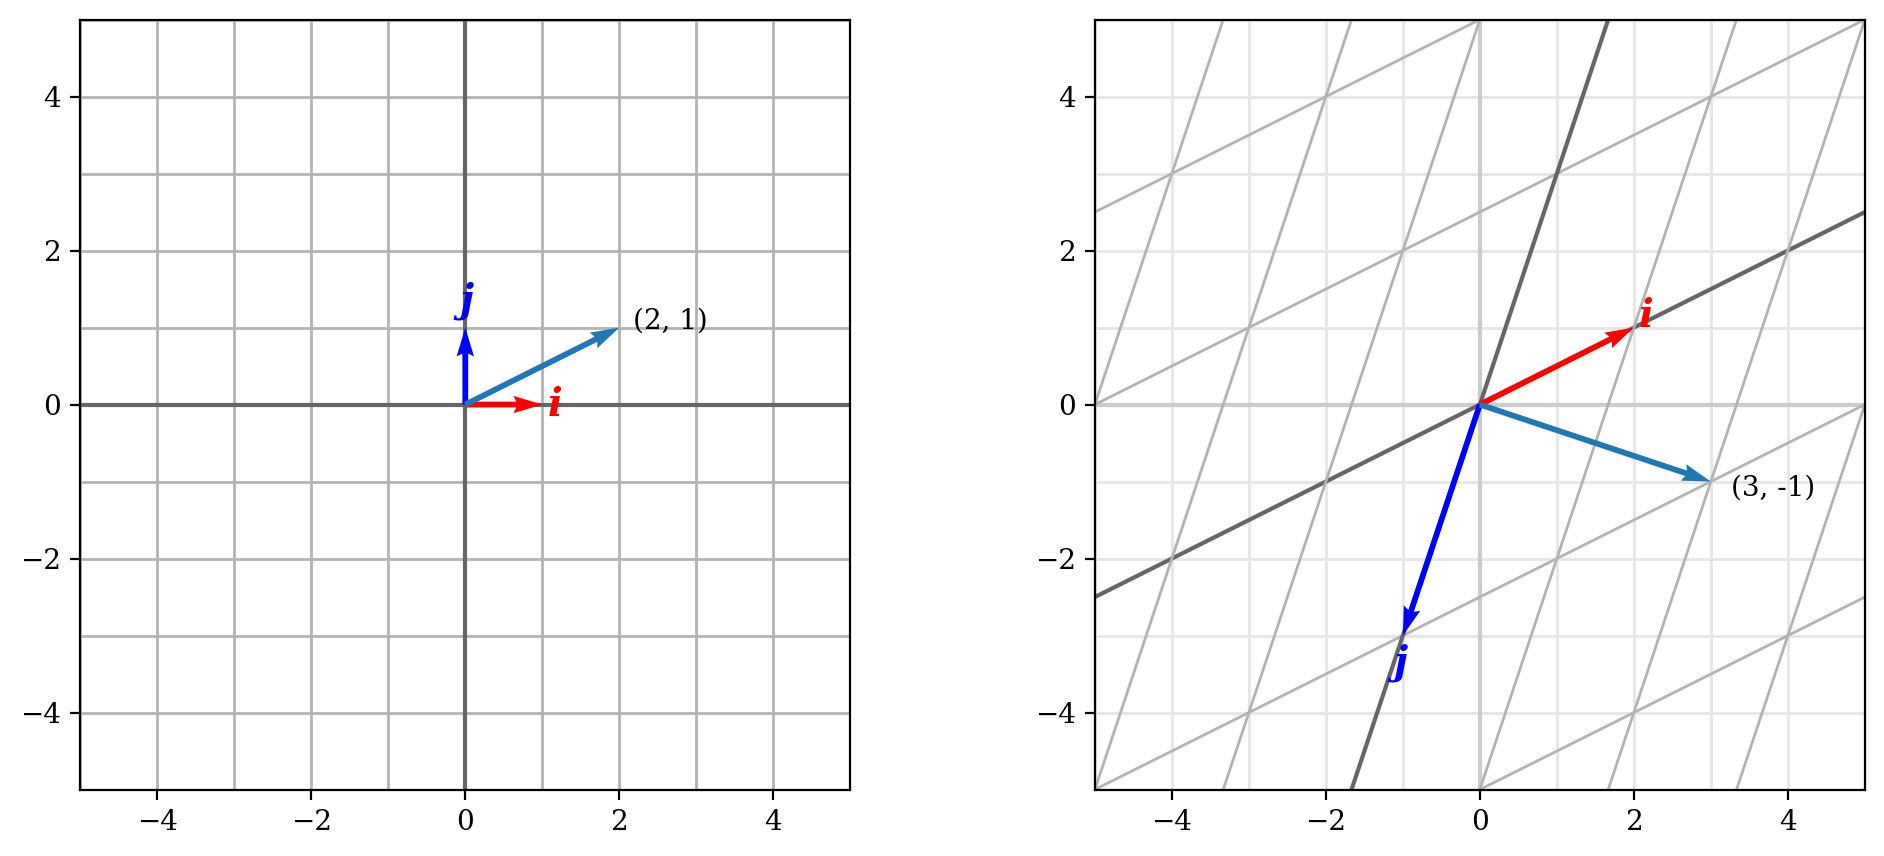

In [4]:
mt.fit(np.array([[2, -1], [1, -3]]))
plt.close()
mt.transform(np.array([[2, 1]]))

<font size = '3'>The left graph shows that the sample vector $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ is a linear combination of basis $\mathbf{i}=\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\mathbf{j}=\begin{bmatrix} 0 \\ 1 \end{bmatrix}:\text{sample vector} = 2\mathbf{i} + 1\mathbf{j}$. This is true because it follows the rule of vector addition. One can follow the gridline and find that the sample vector is indeed the addition of two $\mathbf{i}$s and one $\mathbf{j}$. On the right-hand side, the basis vectors $\mathbf{i}$ and $\mathbf{j}$ have transformed to the points $(2, 1), (1, -3)$, and the sample vector maintains the linear combination of $2\mathbf{i} + 1\mathbf{j}$. As a result, the sample vector now points at $(3, -1)$.</font>

# 4 Transformation Matrices
<font size = '3'>There are several elemental transformations a 2 × 2 matrix can achieve; any other transformations can be viewed as a combination of these fundamental forms. The elemental transformations are: rotation, shear, stretch, scaling, and reflection.</font>

## 4.1 Rotation
<font size = '3'>In a rotation, the gridlines rotate by an angle about the origin. The basis vectors remain orthogonal, and keep their norms (length). The effect on a vector is a change of direction with norm preserved.</font>

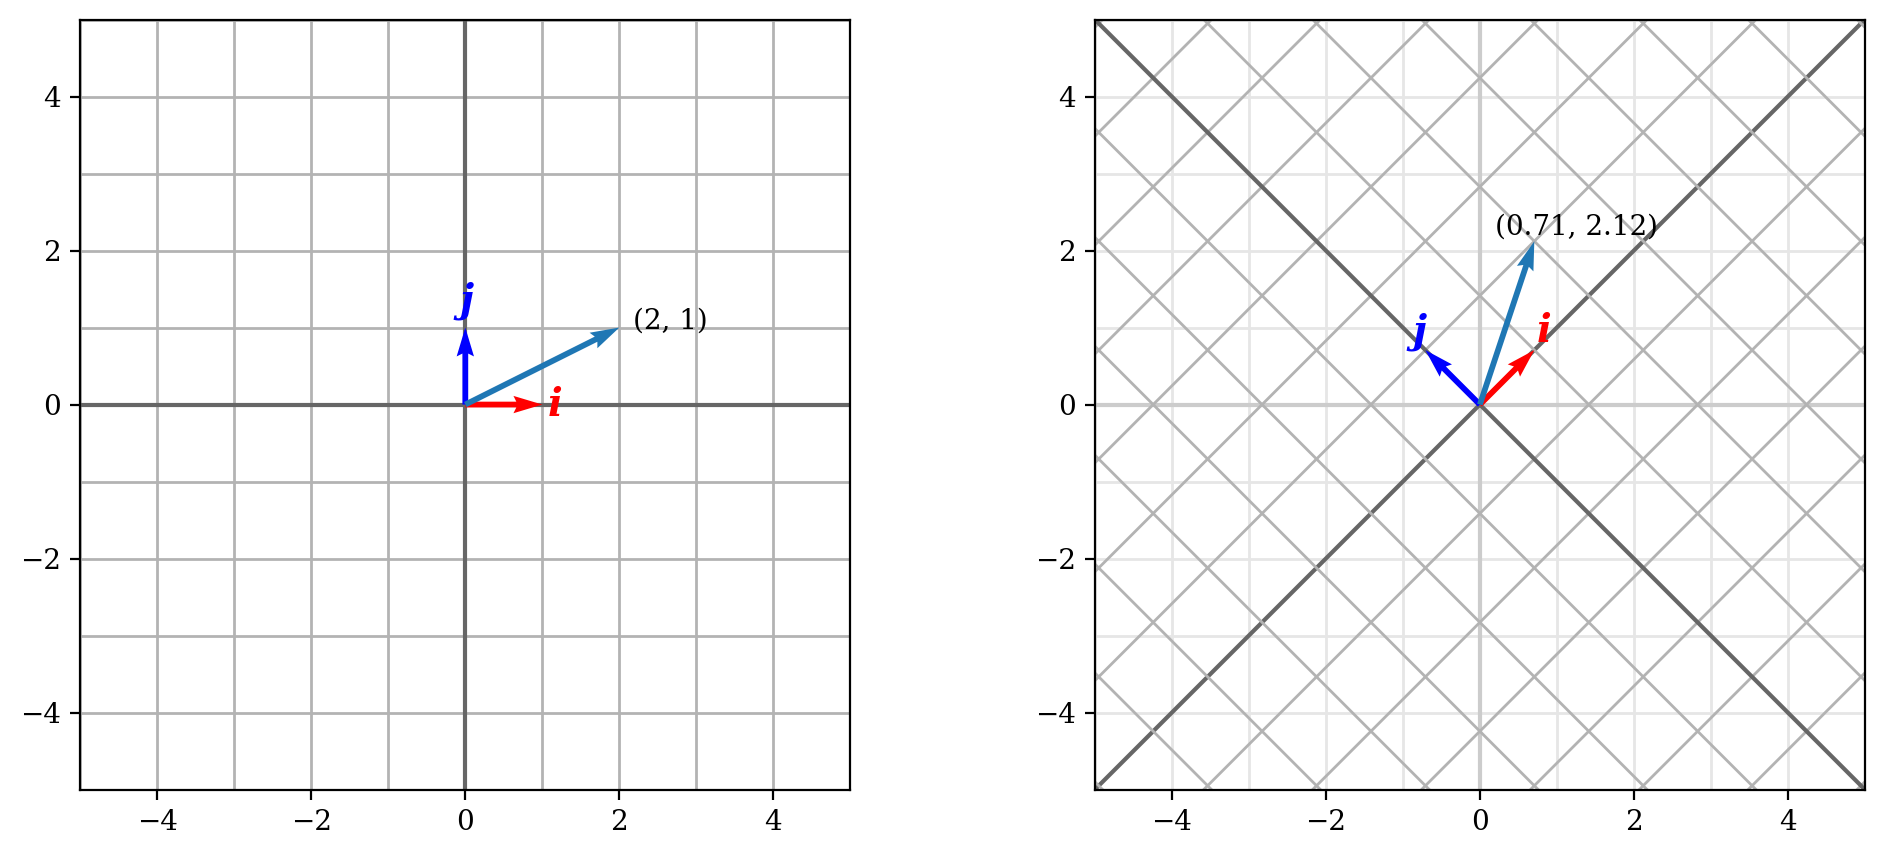

In [5]:
mt.fit(np.array([[1/np.sqrt(2), -1/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)]]))
plt.close()
mt.transform(np.array([[2, 1]]))

<font size = '3'>In this example, the transformation is a counter-clockwise rotation of 45°. And the matrix is
    $\begin {bmatrix}
    \sin\frac{\pi}{4} & -\cos\frac{\pi}{4} \\
    \cos\frac{\pi}{4} & \sin\frac{\pi}{4}
    \end{bmatrix}$.
The general form of a counterclockwise rotation by an angle θ is
    $\begin {bmatrix}
    \sin\theta & -\cos\theta \\
    \cos\theta & \sin\theta
    \end{bmatrix}$.
</font>

## 4.2 Shear
<font size = '3'>In a shear transformation, one of the basis vectors rotates about the origin and gains length such that its projection on the axis it used to reside on remains 1. Mathematically speaking, a shear parallel to x axis will have the basis vector $\mathbf{j}$ become $\begin{bmatrix} k\\1 \end{bmatrix}$, whereas a shear parallel to y axis has the vector $\mathbf{i}$ become $\begin{bmatrix} 1\\k \end{bmatrix}$. The effect on a vector is rotation plus elongation. The general form of a shear parallel to x axis is $\begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix}$.</font>

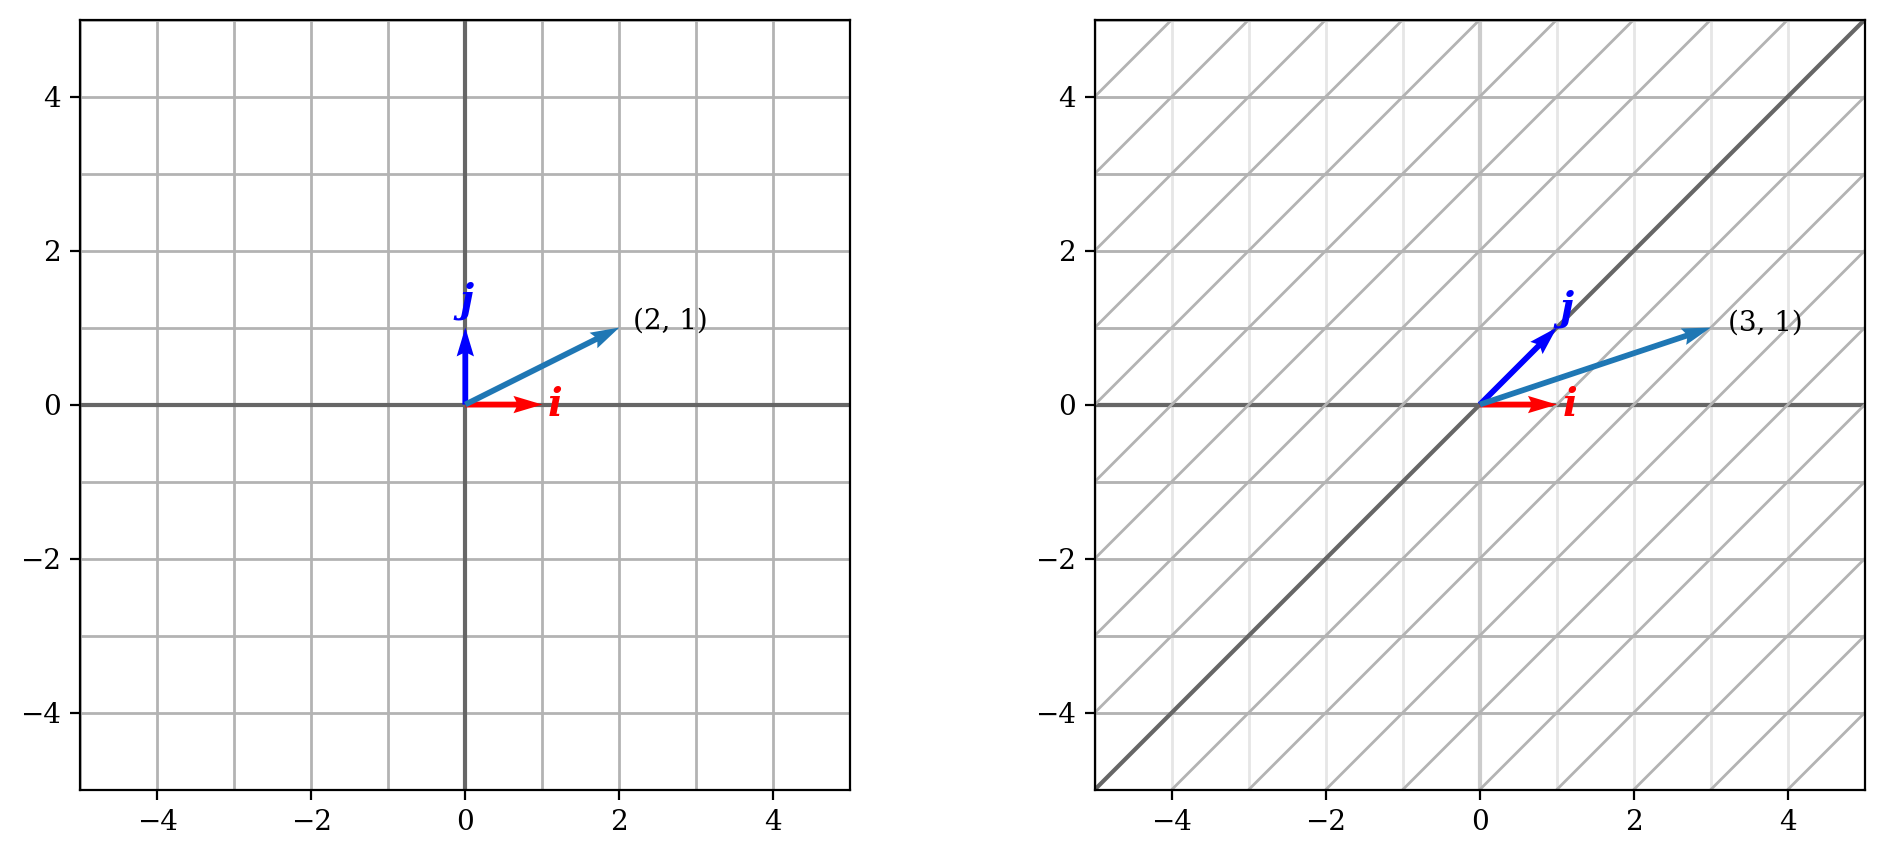

In [6]:
mt.fit(np.array([[1, 1], [0, 1]]))
plt.close()
mt.transform(np.array([[2, 1]]))

<font size = '3'>This example shows a shear parallel to x-axis, the matrix is 
    $\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$.
</font>

## 4.3 Stretching
<font size = '3'> A stretching transformation is achieved when one of the basis vectors scales. The effect on a vector is rotation plus elongation. In this example, basis vector $\mathbf{j}$ is scaled by a factor of 2. When the scaling factor $<$ 0, the transformation is technically a compression. The general form of a stretching in the y direction is
    $\begin{bmatrix} 1 & 0 \\ 0 & k \end{bmatrix}$.</font>

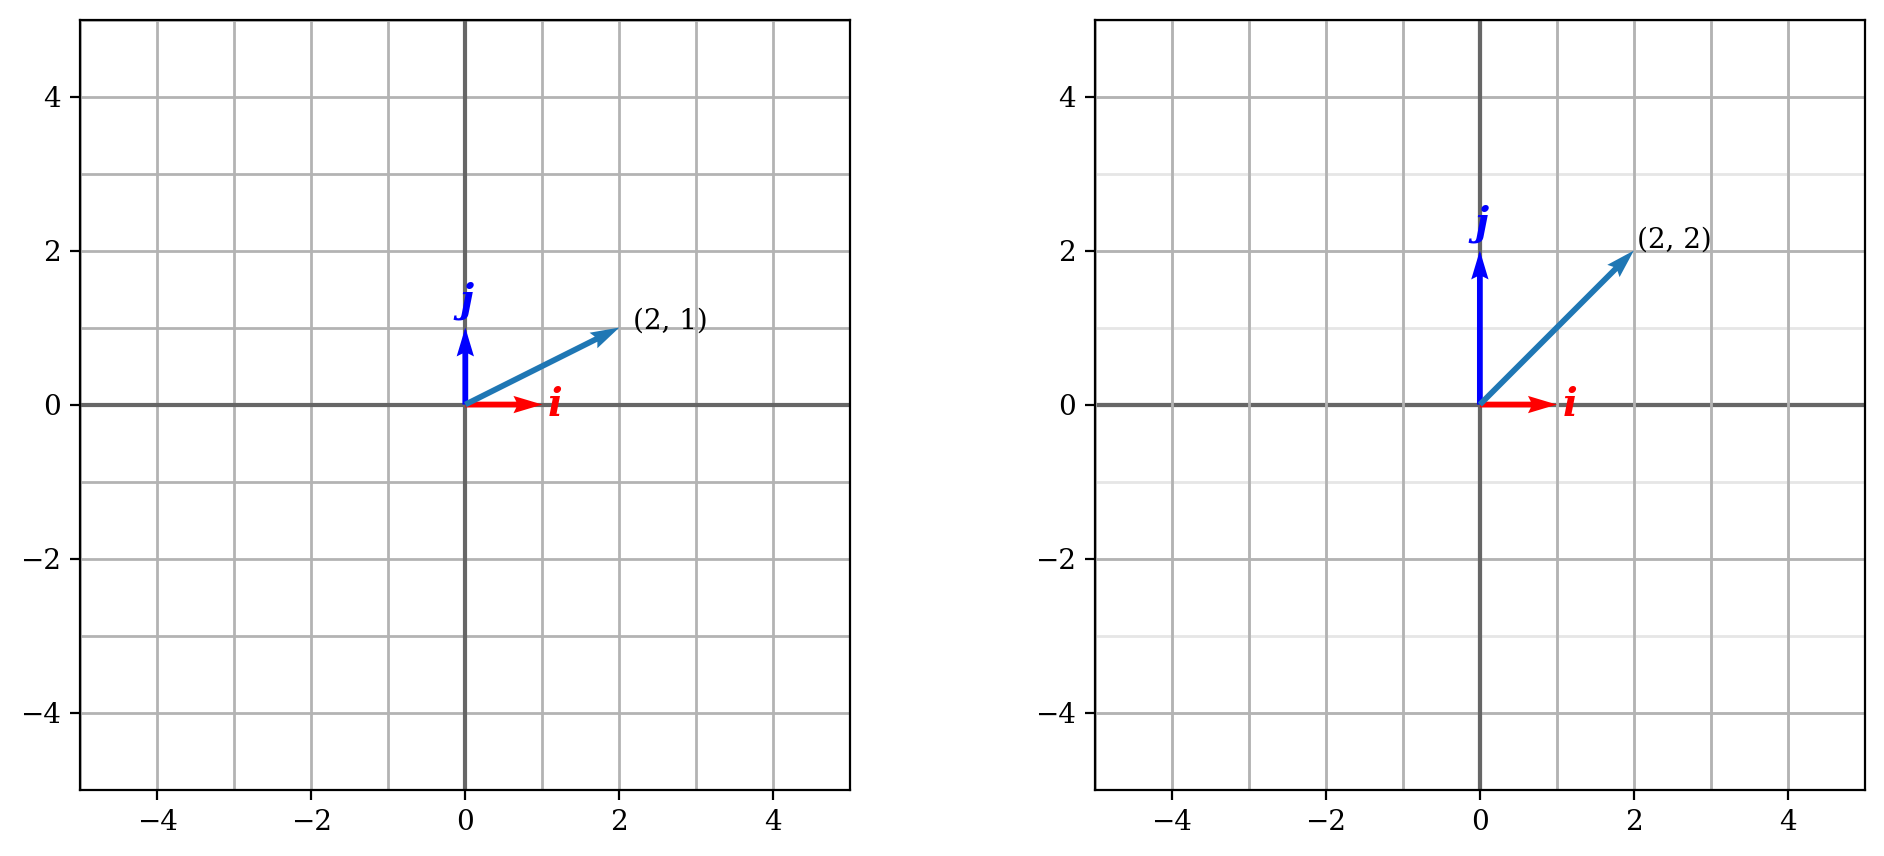

In [7]:
mt.fit(np.array([[1, 0], [0, 2]]))
plt.close()
mt.transform(np.array([[2, 1]]))

<font size = '3'>The matrix in this example is $\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}$.</font>

## 4.4 Scaling
<font size = '3'>Unlike stretching, scaling is when both basis vectors scale by the same factor. The effect on a vector is a scaling on its norm with direction preserved. When the scaling factor $<$ 0, the vector shortens. The general form or a scaling matrix is $\begin{bmatrix} k & 0 \\ 0 & k \end{bmatrix}$.</font>

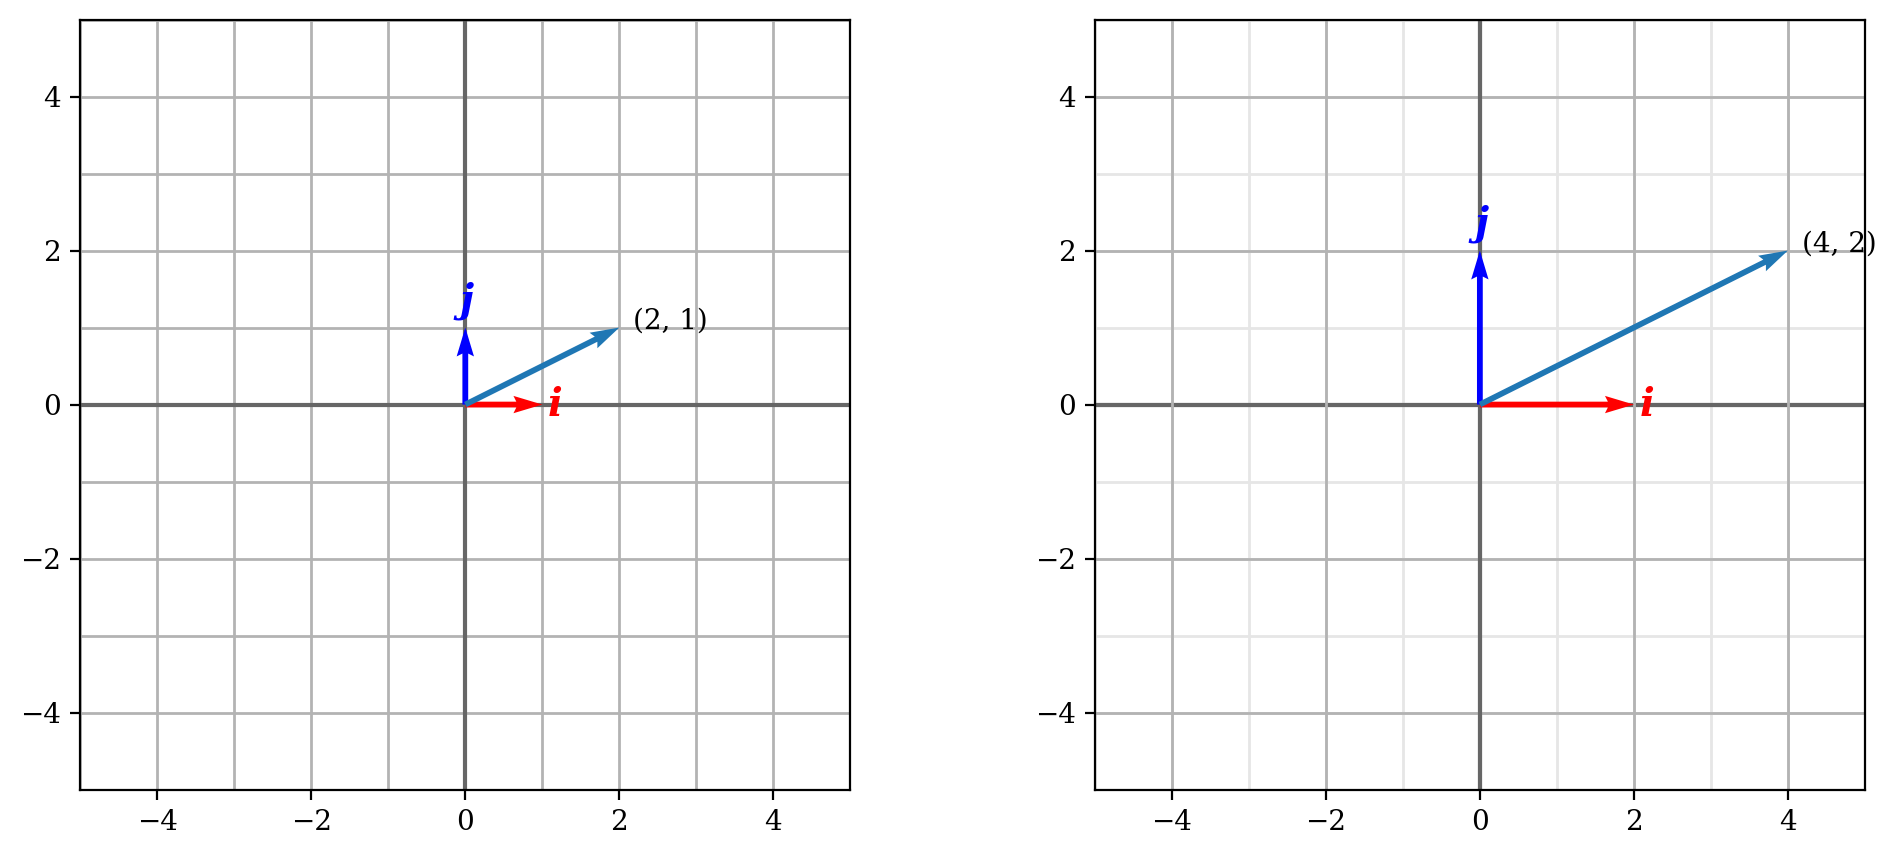

In [8]:
mt.fit(np.array([[2, 0], [0, 2]]))
plt.close()
mt.transform(np.array([[2, 1]]))

<font size = '3'>The matrix in this example is $\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$.</font>

## 4.5 Reflection
<font size = '3'>Reflection happens when the gridline flips about a line that passes through the origin. The effect on the vector is that the vector also flips about the same line.
    
The general form of a reflection matrix is
    $\mathbf{A} = \cfrac{1}{\|\mathbf{l}\|}
     \begin{bmatrix} 
         l_x^2-l_y^2 & 2l_xl_y \\
         2l_xl_y & l_y^2-l_x^2 \end{bmatrix}$, where 
    $\mathbf{l} = \begin{bmatrix} l_x\\l_y \end{bmatrix}$ is a vector in the direction of the line.
</font>

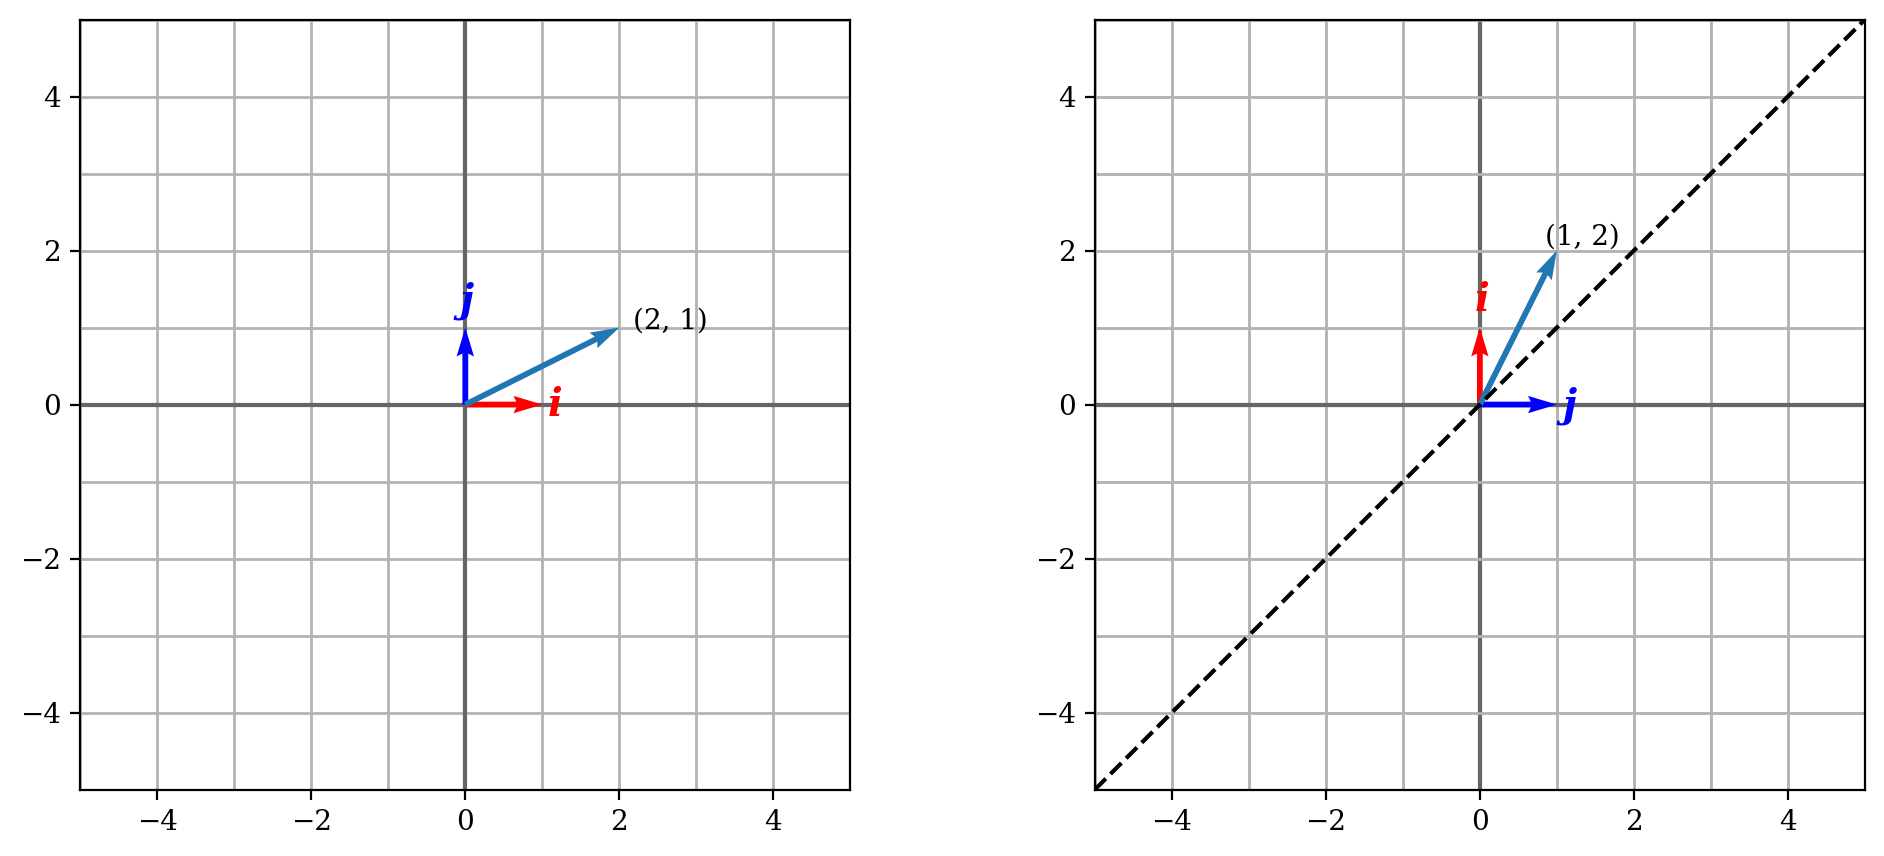

In [9]:
mt.fit(np.array([[0, 1], [1, 0]]))
plt.close()
mt.transform(np.array([[2, 1]]))
mt.axs_[1].plot([-5, 5], [-5, 5], 'k--')
mt.fig_

<font size = '3'>In this example, the line is y = x, a diagonal line between x and y through the first and third quadrants, and the matrix is $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$.</font>

# 5. Dimensionality Reduction
<font size = '3'>When the two basis vectors become linearly dependent, the matrix transforms the 2D space into a 1D line. In the example below, the matrix is $\begin{bmatrix} 1 & -1 \\ 1 & -1 \end{bmatrix}$, where $\mathbf{j} = -\mathbf{i}$. The vector $\begin{bmatrix} 1\\1 \end{bmatrix}$ shrinks to the origin, becomes a zero vector.</font>

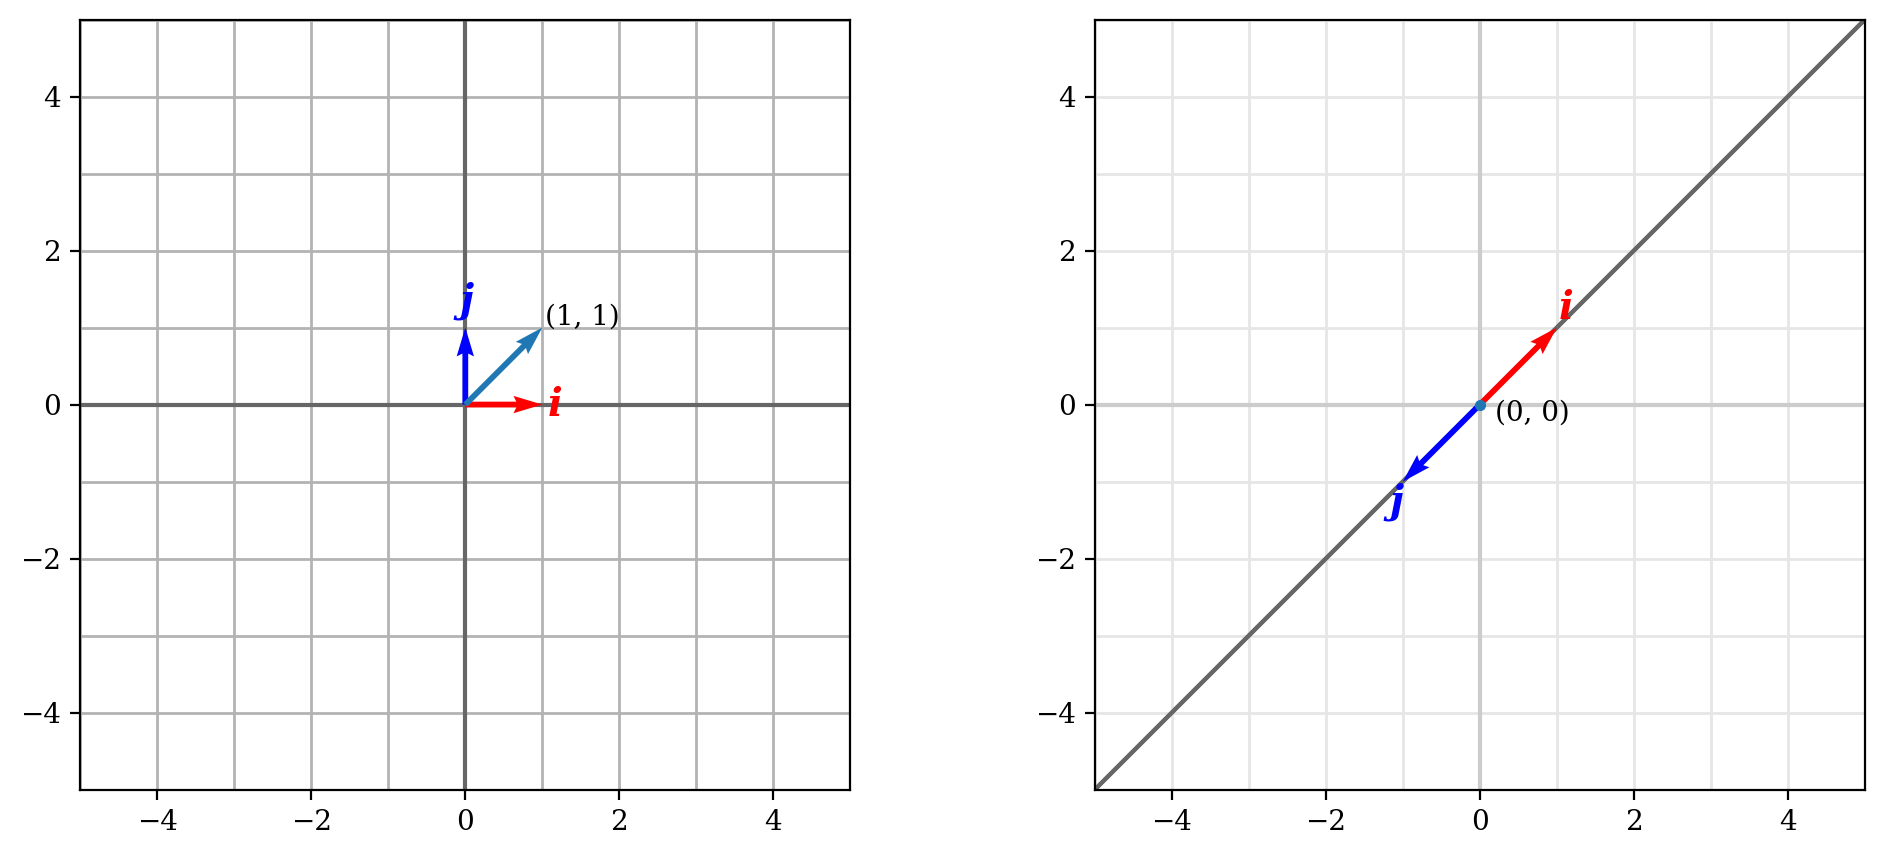

In [10]:
mt.fit(np.array([[1, -1], [1, -1]]))
plt.close()
mt.transform(np.array([[1, 1]]))

## 5.1 Orthogonal Projection
<font size = '3'>A special case of the dimensionality reduction is called orthogonal projection, which means the effect of the matrix on the vector is turning the vector into its orthogonal projection onto the line that the space becomes. The general form of an orthogonal projection matrix is
    $\mathbf{A} = \cfrac{1}{\|\mathbf{u}\|}
     \begin{bmatrix} 
         u_x^2 & u_xu_y \\
         u_xu_y & u_y^2 \end{bmatrix}$, where 
    $\mathbf{u} =\begin{bmatrix} u_x\\u_y \end{bmatrix}$ is a vector in the direction of the line.
</font>

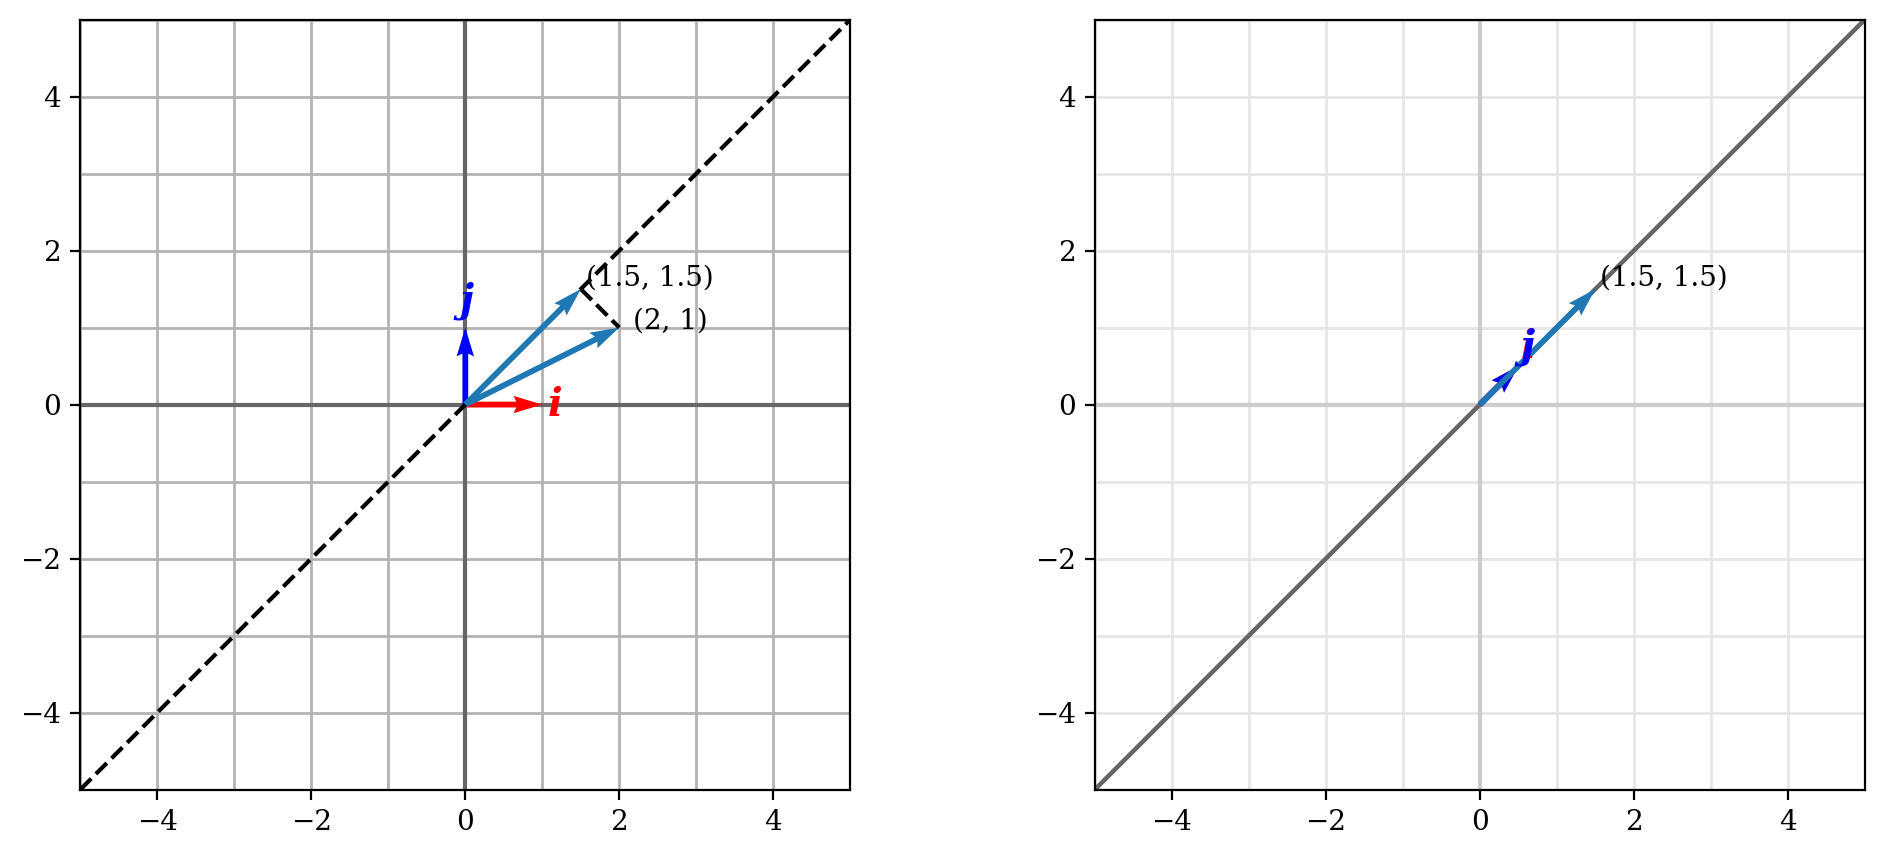

In [11]:
mt.fit(np.array([[0.5, 0.5], [0.5, 0.5]]))
plt.close()
mt.transform(np.array([[2, 1]]))
mt.axs_[0].plot([-5, 5], [-5, 5], 'k--')
mv.plot_vectors(np.array([[1.5, 1.5]]), ax = mt.axs_[0])
mt.axs_[0].plot([1.5, 2], [1.5, 1], 'k--')
mt.fig_

<font size = '3'>In this example, the line is y = x, and the vector $\begin{bmatrix}2\\1\end{bmatrix}$ gets projected onto the line, becomes $\begin{bmatrix}1.5\\1.5\end{bmatrix}$.</font>

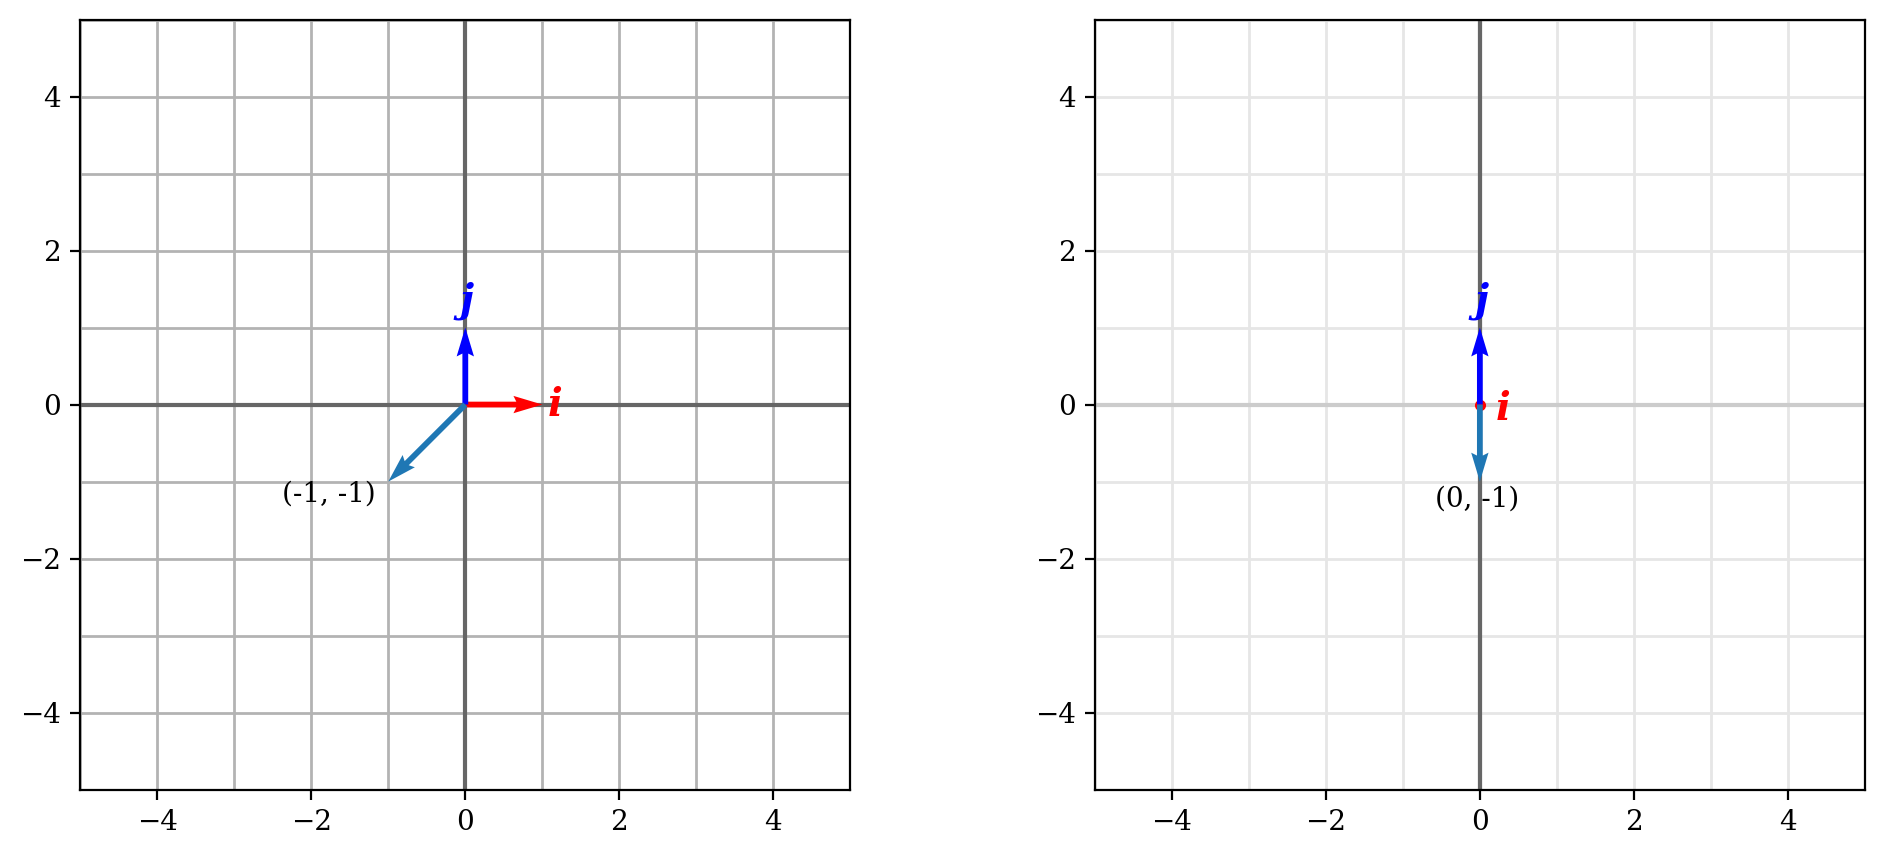

In [12]:
mt.fit(np.array([[0, 0], [0, 1]]))
plt.close()
mt.transform(np.array([[-1, -1]]))

<font size = '3'>In this example, the vector $\begin{bmatrix}-1\\-1\end{bmatrix}$ gets projected onto the y-axis and becomes $\begin{bmatrix}0\\-1\end{bmatrix}$.</font>